# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** |A method of representing categorical variables as binary vectors, where each category is assigned a unique position marked with a 1 and all others 0  |
| **Feature selection*** |The process of choosing a subset of relevant predictors that contribute most to the model’s performance, reducing dimensionality and overfitting  |
| **Classifier** |An algorithm that assigns input data to one of several predefined categories or classes  |
| **Precision** |TP/(TP+FP) |
| **Recall** |TP/(TP+FN)  |
| **F1 Score** |2*(Precision*Recall)/(Precision+Recall)  |
| **Parsimonious model** |A model that explains the data well using the fewest possible predictors or parameters  |
| **Ridge regression** |A linear regression method with L2 regularization that penalizes large coefficients  |
| **LASSO regression** |A linear regression method with L1 regularization that can shrink some coefficients to zero for feature selection  |
| **Cross validation** |A resampling technique that splits data into training and validation sets multiple times to assess model performance and prevent overfitting  |
| **Tree based methods** |Models that use decision trees to make predictions by recursively splitting data based on feature values  |

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
A perfect classifier has an ROC curve that goes straight up the y-axis to (0,1) and then across the top to (1,1). A bad classifier lies along the diagonal line from (0,0) to (1,1).
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?
When F1 ≈ 1, both precision and recall are high. When F1 ≈ 0, either precision or recall (or both) are very low.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** |Straight line  |S-shaped  |
| **Dependent Variable Type** |Continuous  |Categorical  |
| **Purpose** (regression or classification) |Regression  |Classification  |
| **Range of output variable** ($y_i$ or $p_i$) |-∞ to +∞  |0 to 1  |
| **Method*** |Ordinary Least Squares  |Maximum Likelihood Estimation  |
| **Example of use** |Predicting house prices from square footage  |Predicting whether a patient has a disease (yes or no)  |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).
It’s important to train then test a model to make sure it learns patterns from the data rather than just memorizing it, which helps evaluate how well it will perform on new, unseen data. We do this by splitting the dataset into a training set (to fit the model) and a testing set (to assess its accuracy or error). This process helps detect overfitting and ensures the model generalizes well.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

Linear regression is appropriate for the housing.csv dataset because the dependent variable (median_house_value) is continuous and numeric, making it suitable for predicting with a continuous-valued output model. The predictors (e.g., median_income, total_rooms, housing_median_age) are also quantitative variables that are likely to have a linear or approximately linear relationship with house value. This allows linear regression to model how changes in these features correspond to changes in housing prices.

In [3]:
library(tidyverse)
housing <- read_csv("housing.csv")

Rows: 20640 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): longitude, latitude, housing_median_age, total_rooms, population, h...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [4]:
set.seed(123)
housing_scaled <- housing %>%
  mutate(across(where(is.numeric), scale))
train_indices <- sample(1:nrow(housing_scaled), 0.75 * nrow(housing_scaled))
train_data <- housing_scaled[train_indices, ]
test_data <- housing_scaled[-train_indices, ]

#### c) Fit the model.

In [5]:
model <- lm(median_house_value ~ ., data = train_data)
summary(model)


Call:
lm(formula = median_house_value ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6929 -0.3844 -0.1012  0.2669  7.0686 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.0008768  0.0048872  -0.179   0.8576    
longitude          -0.7237084  0.0143999 -50.258   <2e-16 ***
latitude           -0.7732900  0.0145054 -53.310   <2e-16 ***
housing_median_age  0.1227835  0.0054735  22.432   <2e-16 ***
total_rooms        -0.0370233  0.0149344  -2.479   0.0132 *  
population         -0.4003812  0.0118345 -33.832   <2e-16 ***
households          0.4767179  0.0165913  28.733   <2e-16 ***
median_income       0.6333746  0.0060701 104.344   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.608 on 15472 degrees of freedom
Multiple R-squared:  0.6285,	Adjusted R-squared:  0.6284 
F-statistic:  3740 on 7 and 15472 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

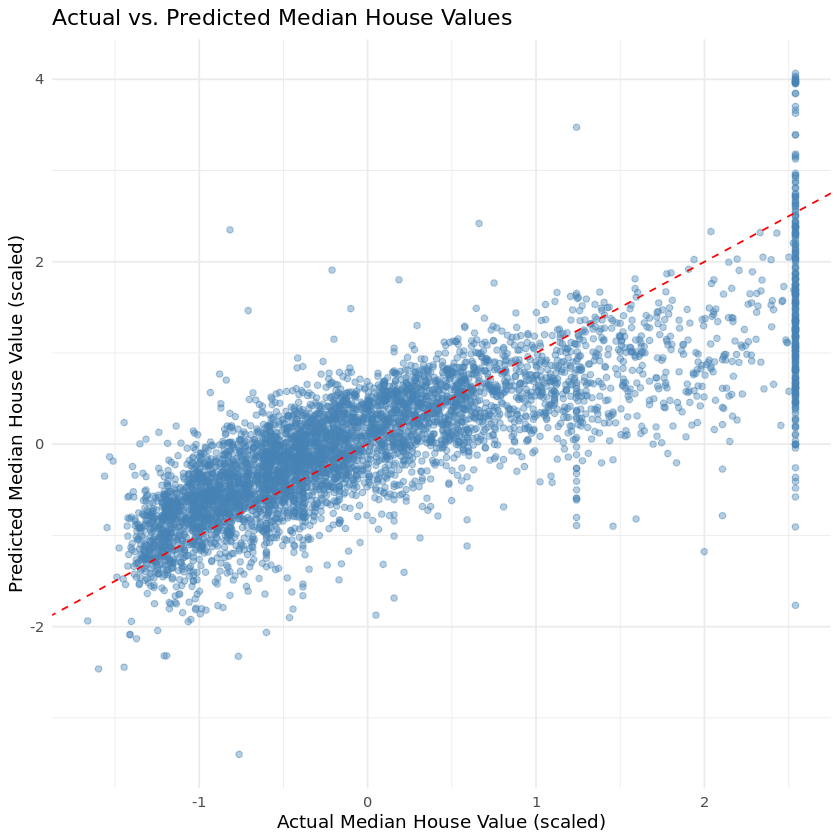

In [6]:
predictions <- predict(model, newdata = test_data)

results <- data.frame(
  Actual = test_data$median_house_value,
  Predicted = predictions
)

library(ggplot2)

ggplot(results, aes(x = Actual, y = Predicted)) +
  geom_point(alpha = 0.4, color = "steelblue") +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(
    title = "Actual vs. Predicted Median House Values",
    x = "Actual Median House Value (scaled)",
    y = "Predicted Median House Value (scaled)"
  ) +
  theme_minimal()

#### e) Make a residuals plot.

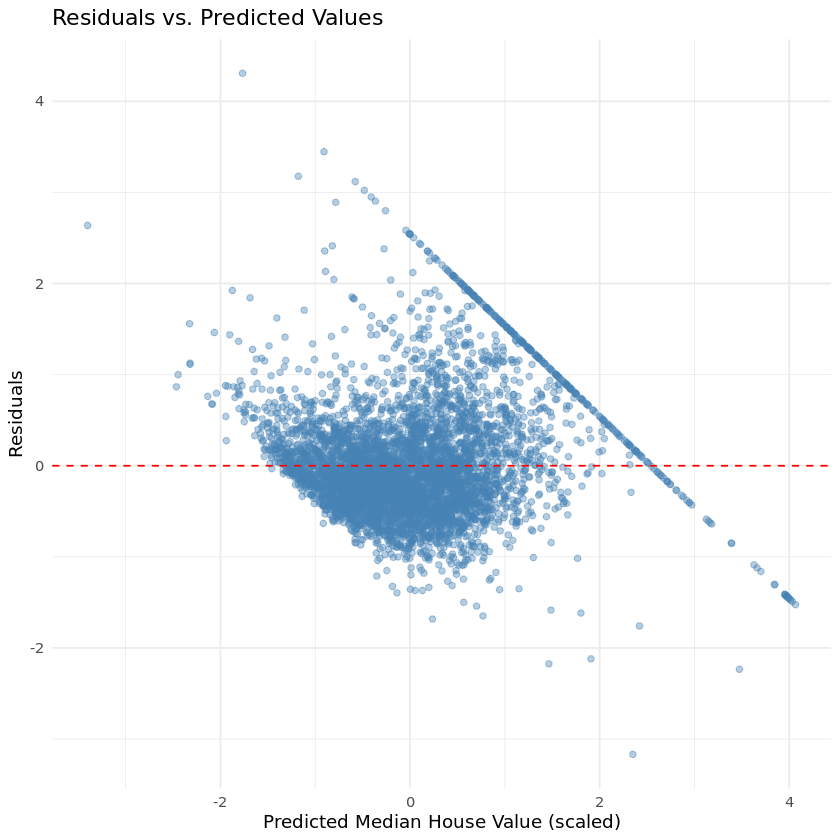

In [8]:
residuals <- test_data$median_house_value - predictions

residuals_df <- data.frame(
  Predicted = predictions,
  Residuals = residuals
)

ggplot(residuals_df, aes(x = Predicted, y = Residuals)) +
  geom_point(alpha = 0.4, color = "steelblue") +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  labs(
    title = "Residuals vs. Predicted Values",
    x = "Predicted Median House Value (scaled)",
    y = "Residuals"
  ) +
  theme_minimal()

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?
Logistic regression is appropriate for the diabetes.csv dataset because the dependent variable (Outcome) is binary — it takes values 0 (no diabetes) or 1 (diabetes). Logistic regression models the probability of belonging to one of two categories based on predictor variables (like Glucose, BMI, and Age) using the logit (S-shaped) function, making it ideal for classification problems rather than continuous prediction.

In [11]:
library(tidyverse)
diabetes <- read_csv("diabetes.csv")

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [12]:
diabetes_scaled <- diabetes %>%
  mutate(across(-Outcome, scale))
set.seed(123)
train_indices <- sample(1:nrow(diabetes_scaled), 0.75 * nrow(diabetes_scaled))
train_data <- diabetes_scaled[train_indices, ]
test_data <- diabetes_scaled[-train_indices, ]

#### c) Fit the model.

In [13]:
logit_model <- glm(Outcome ~ ., data = train_data, family = binomial)
summary(logit_model)


Call:
glm(formula = Outcome ~ ., family = binomial, data = train_data)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -0.90319    0.11273  -8.012 1.13e-15 ***
Pregnancies               0.39262    0.12637   3.107  0.00189 ** 
Glucose                   1.17671    0.14189   8.293  < 2e-16 ***
BloodPressure            -0.26430    0.11480  -2.302  0.02131 *  
SkinThickness             0.07704    0.12533   0.615  0.53875    
Insulin                  -0.15585    0.11655  -1.337  0.18117    
BMI                       0.67134    0.13611   4.932 8.12e-07 ***
DiabetesPedigreeFunction  0.23841    0.10927   2.182  0.02912 *  
Age                       0.18663    0.12792   1.459  0.14456    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 538.57  on 567  degrees of freedom
AIC: 556.57

Number

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [14]:
pred_probs <- predict(logit_model, newdata = test_data, type = "response")
pred_class <- ifelse(pred_probs >= 0.5, 1, 0)
actual_class <- test_data$Outcome
TP <- sum(pred_class == 1 & actual_class == 1)
FP <- sum(pred_class == 1 & actual_class == 0)
TN <- sum(pred_class == 0 & actual_class == 0)
FN <- sum(pred_class == 0 & actual_class == 1)
accuracy <- (TP + TN) / length(actual_class)

confusion_table <- data.frame(
  TP = TP,
  FP = FP,
  TN = TN,
  FN = FN,
  Accuracy = accuracy
)
confusion_table

TP,FP,TN,FN,Accuracy
<int>,<int>,<int>,<int>,<dbl>
36,13,112,31,0.7708333


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

#### f) Make a plot of actual vs. predicted values for the LASSO model.